In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from helpers import read_csv_with_pandas

In [93]:
class SimpleImputer:
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.statistics_ = None

    def fit(self, X):
        if self.strategy == 'mean':
            self.statistics_ = np.nanmean(X, axis=0)
        elif self.strategy == 'median':
            self.statistics_ = np.nanmedian(X, axis=0)
        else:
            raise ValueError("Unsupported strategy. Please use 'mean' or 'median'.")

    def transform(self, X):
        if self.statistics_ is None:
            raise ValueError("Imputer not fitted. Call fit() first.")
        
        # Replace NaN values with the computed statistics
        X_imputed = np.where(np.isnan(X), self.statistics_, X)
        
        return X_imputed

In [94]:
df_train = pd.read_csv('data/aps_failure_training_set.csv')

In [95]:
df_train['class'] = df_train['class'].replace(['pos','neg'],[1,0])
df_train = df_train.replace('na',np.NaN)
df_train.head()

,id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,0,76698,NaN,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,NaN,0,NaN,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,NaN,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,NaN,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [96]:
df_train = df_train.astype(float)
for i in df_train:
  if df_train[i].std() == 0:
    df_train = df_train.drop([i],axis=1)
    print('The feature with zero variance is : ',i)
df_train.shape

The feature with zero variance is :  cd_000


(60000, 171)

In [97]:
df_train = df_train.drop_duplicates(keep = 'first')
df_train = df_train.T.drop_duplicates().T
print(df_train.shape)

(60000, 171)


In [98]:
missing_feature_count = dict(df_train.drop('class',axis=1).isnull().sum())
missing_feature_count = dict(sorted(missing_feature_count.items(), key=lambda item:item[1],reverse=True))

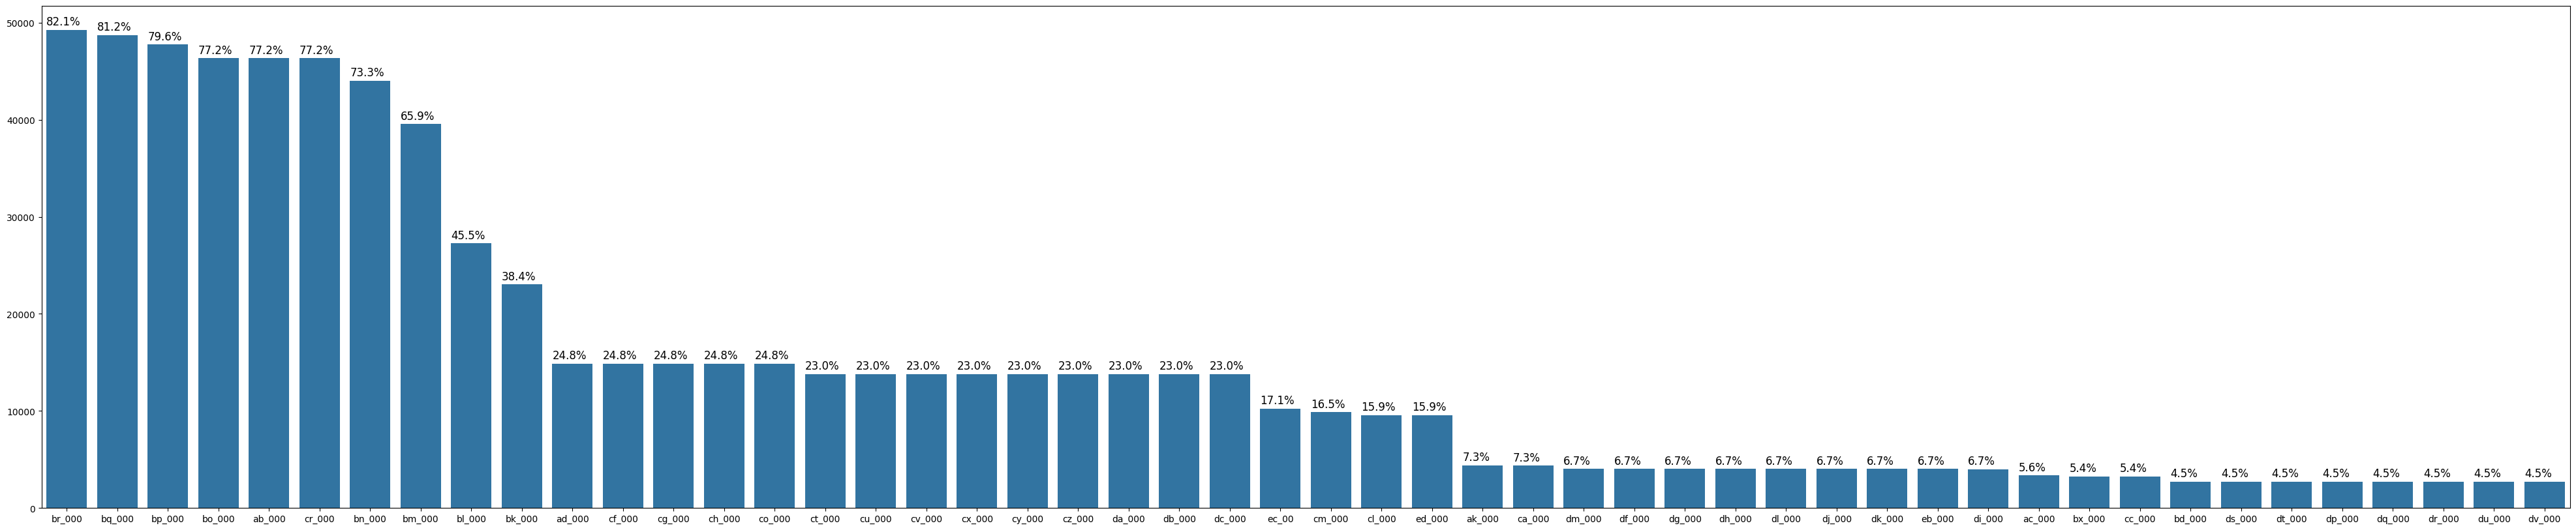

In [99]:
#https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
import seaborn as sns
def barplot(data,sum):
  plt.figure(figsize = (50,10))
  ax = sns.barplot(x = list(data.keys())[:50], y = list(data.values())[:50])

  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/sum)
    x = p.get_x() 
    y = p.get_height()+500
    ax.annotate(percentage,(x,y),size=12)
barplot(missing_feature_count,df_train.shape[0])

In [104]:
from sklearn.model_selection import train_test_split
X = df_train.drop('class',axis=1)
y = df_train['class']

In [105]:
median_imputer = SimpleImputer(strategy='median')
median_imputer.fit(X)
X_median = median_imputer.transform(X)

In [106]:
X_median = pd.DataFrame(X_median, columns=X.columns)

In [107]:
X_median

,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2.0,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996.0,153002.0,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,59997.0,2286.0,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,59998.0,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,59999.0,80292.0,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [108]:
from sklearn import preprocessing
def normalize(df):
  x = df.values 
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  return x_scaled, min_max_scaler
X_scaled_median, mx = normalize(X_median)

In [109]:
X_scaled_median

array([[0.00000000e+00, 2.79250729e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66669444e-05, 1.20361295e-02, 0.00000000e+00, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [3.33338889e-05, 1.49423061e-02, 0.00000000e+00, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99966666e-01, 4.07782233e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99983333e-01, 2.92336170e-02, 0.00000000e+00, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.46444794e-02, 0.00000000e+00, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [110]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_scaled_median)
chi_square_value, p_value

(23538219.21078194, 0.0)

In [111]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_scaled_median)
kmo_model

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.5363196484375452

In [112]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Assuming df_train_median is your DataFrame containing the data
fa = FactorAnalyzer()
fa.fit(X_scaled_median, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [113]:
ev

array([4.85911680e+01, 7.99140166e+00, 7.22910667e+00, 6.05212562e+00,
       4.89522490e+00, 3.97949646e+00, 3.29345539e+00, 3.00011694e+00,
       2.97627808e+00, 2.62753487e+00, 2.41791490e+00, 2.34759118e+00,
       2.07737858e+00, 1.97585945e+00, 1.92173942e+00, 1.83566257e+00,
       1.72525301e+00, 1.70873102e+00, 1.64643810e+00, 1.64223216e+00,
       1.58716893e+00, 1.55096915e+00, 1.52030358e+00, 1.47775305e+00,
       1.33407819e+00, 1.31128557e+00, 1.28723393e+00, 1.22813074e+00,
       1.20271846e+00, 1.17508374e+00, 1.16436020e+00, 1.14399967e+00,
       1.12245643e+00, 1.10045952e+00, 1.09607148e+00, 1.08222324e+00,
       1.04271470e+00, 1.01801455e+00, 1.01124699e+00, 1.00260126e+00,
       9.93255423e-01, 9.82109948e-01, 9.71451050e-01, 9.51169808e-01,
       9.47427143e-01, 9.35019832e-01, 9.20200898e-01, 8.94059430e-01,
       8.80106469e-01, 8.33157874e-01, 8.21959088e-01, 7.77896398e-01,
       7.67805712e-01, 7.52061563e-01, 7.25271692e-01, 7.16988550e-01,
      

In [114]:
greater_than_1 = ev[ev > 1]

# Count the number of values greater than 1
count_greater_than_1 = len(greater_than_1)

# Print the results
print("Number of values greater than 1:", count_greater_than_1)

Number of values greater than 1: 40


In [116]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(X_scaled_median, 10)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [117]:
fa.get_factor_variance()

(array([38.05544796, 17.65507052,  7.04690112]),
 array([0.22385558, 0.10385336, 0.04145236]),
 array([0.22385558, 0.32770893, 0.36916129]))

         id    aa_000  ab_000        ac_000    ad_000  ae_000  af_000  ag_000  \
0 -1.000000  0.960028     0.0  2.536555e+06  0.815068     0.0     0.0     0.0   
1 -0.999967  0.047707     0.0 -1.428571e-01 -0.143836     0.0     0.0     0.0   
2 -0.999933  0.214575     0.0  1.285714e-01  0.198630     0.0     0.0     0.0   
3 -0.999900 -0.643141     0.0 -5.952381e-02  0.082192     0.0    10.0     0.0   
4 -0.999867  0.629218     0.0  1.485714e+00  1.424658     0.0     0.0     0.0   

   ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  2.341742  1.785187  1.098967  0.719580  0.934280   
1     0.0     0.0  ...  0.447252  0.321442  0.169461  0.154976  0.179108   
2     0.0     0.0  ...  0.114152  0.236714  0.453451  0.568026  0.866628   
3     0.0     0.0  ... -0.526823 -0.504935 -0.467789 -0.462461 -0.312003   
4     0.0     0.0  ...  0.911234  0.561559  0.412828  0.411068  0.742450   

     ee_007    ee_008    ee_009  ef_000  eg_000  
0  0.7

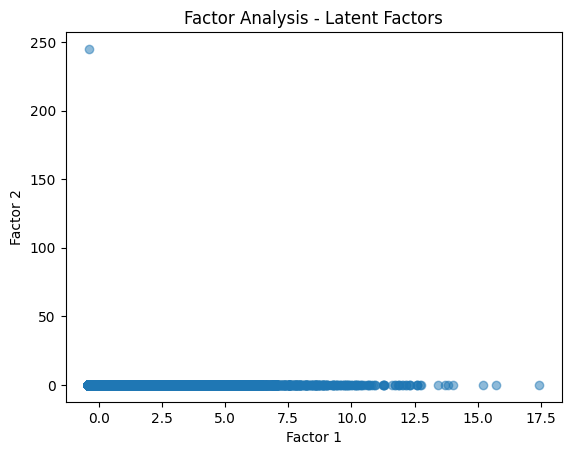

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Load the APS Failure dataset
# Make sure to replace 'your_dataset.csv' with the actual file path or URL
aps_df = df_train

# Data Preprocessing
# (Assuming the target variable is 'target_column_name')
X = aps_df.drop('class', axis=1)
y = aps_df['class']



from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data,
                         columns=X.columns)
print(scaled_df.head())

# Dimensionality Reduction
# Factor Analysis
fa = FactorAnalysis(n_components=5)
X_fa = fa.fit_transform(scaled_df)

# Evaluate Dimensionality Reduction
# Visualize Factor Analysis components
plt.scatter(X_fa[:, 0], X_fa[:, 1], alpha=0.5)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis - Latent Factors')
plt.show()